In [83]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import plotly.express as px
import unidecode

In [2]:
from formula_one import FormulaOne

In [3]:
f1 = FormulaOne()
f1

Data
    Races
        (144, 7)
    Circuits
        (27, 7)
    Results
        (2947, 11)
    Drivers
        (51, 7)
    Constructors
        (19, 4)

In [4]:
f1.update()

'Data is up to date. | Most Recent RaceID: `202106`'

In [21]:
fantasy_rosters = pd.read_csv('./draft/fantasy_rosters.csv', index_col=0)
fantasy_rosters.head()

,OverallPick,TeamPick,Team,DriverID,LastName,FirstName,Car,Nationality
0,1,1,Carlaniel & the Romeos,norris,Norris,Lando,MCLAREN MERCEDES,GBR
1,2,1,Scuderia Spaghetti,hamilton,Hamilton,Lewis,MERCEDES,GBR
2,3,1,3 Orange Whips,max_verstappen,Verstappen,Max,RED BULL RACING HONDA,NED
3,4,1,Deep Fried,bottas,Bottas,Valtteri,MERCEDES,FIN
4,5,2,Deep Fried,perez,Perez,Sergio,RED BULL RACING HONDA,MEX


In [59]:
pts_per_round = (
    f1.results.loc[f1.results['RaceID'] > 202100]
    .merge(fantasy_rosters[['Team', 'DriverID']], 
           on='DriverID')
    .merge(f1.races[['RaceID', 'Round']])
    .sort_values(['RaceID', 'Position'])
    .loc[:, ['Points', 'Team', 'Round']]
    .groupby(['Round', 'Team']).sum()
    .reset_index()
)

pts_per_round.head()

,Round,Team,Points
0,1,3 Orange Whips,19
1,1,Carlaniel & the Romeos,22
2,1,Deep Fried,26
3,1,Scuderia Spaghetti,35
4,2,3 Orange Whips,36


In [93]:
cumulative_points = (
    pts_per_round
    .groupby(['Team', 'Round']).sum()
    .groupby('Team').cumsum()
    .reset_index()
)
cumulative_points.head()

,Team,Round,Points
0,3 Orange Whips,1,19
1,3 Orange Whips,2,55
2,3 Orange Whips,3,78
3,3 Orange Whips,4,98
4,3 Orange Whips,5,135


In [89]:
px.line(x='Round', y='Points', color='Team', data_frame=cumulative_points)

In [92]:
px.bar(x='Round', y='Points', color='Team', data_frame=pts_per_round)

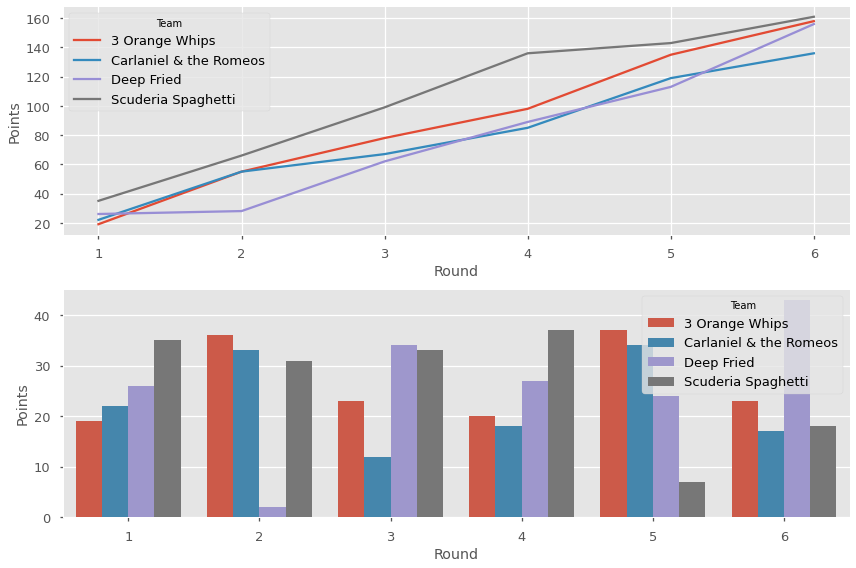

In [81]:
with plt.style.context(['ggplot', 'seaborn-talk']):
    fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(12, 8))
    sns.lineplot(x='Round', y='Points', hue='Team', data=cumulative_points, ax=ax1)
    sns.barplot(x='Round', y='Points', hue='Team', data=pts_per_round, ax=ax2)
    fig.tight_layout()